This is a minimal example of using viiflow in [Julia](https://julialang.org/).
For this to work we need:

- The PyCall package
- Setting the PyCall package to our Python installation where viiflow is installed (or installing viiflow in the python installation that comes with PyCall)

The only complication is the necessity to use pycall for the *init* call and the definition of the return type.
Without this definition, PyCall translates our boundary-layer numpy-ndarray *bl* into a Julia list which *iter* cannot work with.

In [1]:
using PyCall
vft = pyimport("viiflowtools.vf_tools")
vf = pyimport("viiflow")


X = vft.read_selig("S805.dat")
s = vf.setup(Re=1e6,Ma=0,Ncrit=9,Alpha=-5,Silent=true)

# Here it is necessary to define the return type to be an Array of PyObjects
# Otherwise, bl is cast to a Julia list
(p,bl,x) = pycall(vf.init,Array{PyObject},X,s)

alv = []
clv = []
cdv = []

grad = []
for al in -5:.5:20
    s.Alpha = al
    (x,flag,res,grad,gradients) = vf.iter(x,bl,p,s)
    if flag>0
        push!(alv,al)
        push!(clv,p.CL)
        push!(cdv,bl[1].CD) # Julia uses 1-based indexing
    end
end

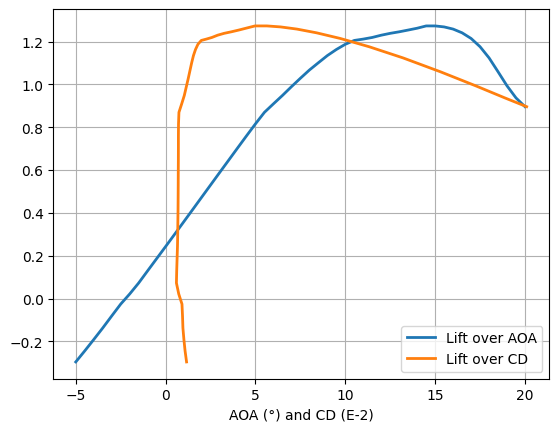

In [2]:
using PyPlot
PyPlot.svg(true)
plot(alv,clv, linewidth=2.0,label="Lift over AOA")
plot(cdv*100,clv, linewidth=2.0,label="Lift over CD")
xlabel("AOA (°) and CD (E-2)")
grid()
legend();